/data/xliu/work/20231211_iDeepB/20240401_trainning_gene/iDeepB_train_weight

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
val_metric = pd.read_table("iDeepB_train_val_metric.txt", header=None)

In [3]:
val_metric.head(2)

,0,1,2,3,4,5,6,7,8,9
0,HNRNPL,K562,poisson_loss,non-log,loss=0.4759421394261749,pearson=0.13826558050486965,spearman=0.09160767149617198,auc=0.6802451278160232,prauc=0.06095596045929401,mse=0.6041793618545923
1,HNRNPUL1,K562,poisson_loss,non-log,loss=0.6346755602205073,pearson=0.056757585060409246,spearman=0.08411203098110917,auc=0.6345902960450224,prauc=0.04091717758475475,mse=1.0922959076653


In [4]:
val_metric.columns = ["protein", "cell", "loss_fun", "log", "loss", "pearson", "spearman", "auc", "prauc", "mse"]

In [5]:
val_metric['pearson'] = val_metric['pearson'].str.replace('pearson=', '').replace("nan", 0).apply(pd.eval)
val_metric['spearman'] = val_metric['spearman'].str.replace('spearman=', '').replace("nan", 0).apply(pd.eval)
val_metric['auc'] = val_metric['auc'].str.replace('auc=', '').replace("nan", 0).apply(pd.eval)
val_metric['prauc'] = val_metric['prauc'].str.replace('prauc=', '').replace("nan", 0).apply(pd.eval)

In [6]:
val_metric = val_metric.fillna(0)
val_metric = val_metric.sort_values(by='spearman')

# 根据列 'B' 和 'C' 删除重复行，保留第一次出现的行
val_metric = val_metric.drop_duplicates(subset=['protein', 'cell'], keep='last')

In [7]:
val_metric.head()

,protein,cell,loss_fun,log,loss,pearson,spearman,auc,prauc,mse
263,SSB,K562,poisson_loss,non-log,loss=32.85963701492264,-0.003952,0.0,0.497395,0.002955,mse=8823.722090692518
241,DHX30,K562,poisson_loss,non-log,loss=-4.964677076356777e+23,0.000000,0.0,0.500000,0.002929,mse=inf
255,PUM2,K562,poisson_loss,non-log,loss=-1.6099609180808363e+24,0.000000,0.0,0.500000,0.001884,mse=inf
61,DROSHA,K562,poisson_loss,non-log,loss=-2.9561213622894218e+23,0.000000,0.0,0.500000,0.004693,mse=inf
92,EFTUD2,K562,poisson_loss,non-log,loss=-1.0124037198557406e+24,0.000000,0.0,0.500000,0.003975,mse=inf


In [14]:
val_metric[["pearson", "pearson", "spearman", "auc", "prauc"]].describe()

,pearson,pearson,spearman,auc,prauc
count,246.000000,246.000000,246.000000,246.000000,246.000000
mean,0.097420,0.097420,0.081942,0.663196,0.108219
std,0.049156,0.049156,0.037998,0.100660,0.219852
min,-0.003952,-0.003952,0.000000,0.000000,0.001203
25%,0.063796,0.063796,0.057957,0.656394,0.019358
50%,0.098167,0.098167,0.083385,0.687612,0.040025
75%,0.128882,0.128882,0.101622,0.712754,0.060826
max,0.238876,0.238876,0.205901,0.801979,0.937217


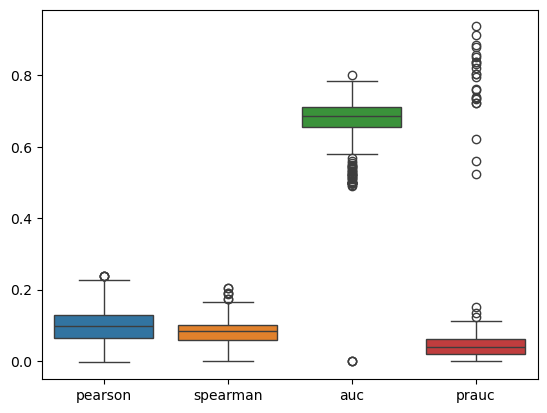

In [13]:
# 绘制DataFrame中所有列的boxplot
sns.boxplot(data=val_metric[["pearson", "pearson", "spearman", "auc", "prauc"]])  #"pearson", "spearman", "auc", "prauc"
plt.show()


In [10]:
import numpy as np
test = val_metric.replace(np.nan, 0)
test.head()

,protein,cell,loss_fun,log,loss,pearson,spearman,auc,prauc,mse
263,SSB,K562,poisson_loss,non-log,loss=32.85963701492264,-0.003952,0.0,0.497395,0.002955,mse=8823.722090692518
241,DHX30,K562,poisson_loss,non-log,loss=-4.964677076356777e+23,0.000000,0.0,0.500000,0.002929,mse=inf
255,PUM2,K562,poisson_loss,non-log,loss=-1.6099609180808363e+24,0.000000,0.0,0.500000,0.001884,mse=inf
61,DROSHA,K562,poisson_loss,non-log,loss=-2.9561213622894218e+23,0.000000,0.0,0.500000,0.004693,mse=inf
92,EFTUD2,K562,poisson_loss,non-log,loss=-1.0124037198557406e+24,0.000000,0.0,0.500000,0.003975,mse=inf


In [11]:
val_metric[["pearson",  "auc", "prauc"]].dtypes

pearson    float64
auc        float64
prauc      float64
dtype: object

In [12]:
val_metric.head()

,protein,cell,loss_fun,log,loss,pearson,spearman,auc,prauc,mse
263,SSB,K562,poisson_loss,non-log,loss=32.85963701492264,-0.003952,0.0,0.497395,0.002955,mse=8823.722090692518
241,DHX30,K562,poisson_loss,non-log,loss=-4.964677076356777e+23,0.000000,0.0,0.500000,0.002929,mse=inf
255,PUM2,K562,poisson_loss,non-log,loss=-1.6099609180808363e+24,0.000000,0.0,0.500000,0.001884,mse=inf
61,DROSHA,K562,poisson_loss,non-log,loss=-2.9561213622894218e+23,0.000000,0.0,0.500000,0.004693,mse=inf
92,EFTUD2,K562,poisson_loss,non-log,loss=-1.0124037198557406e+24,0.000000,0.0,0.500000,0.003975,mse=inf
